Mean MedInc: 3.87
Variance MedInc: 3.61
Std Dev MedInc: 1.90
Full Stats Summary:
                    mean          std      variance
MedInc         3.870671     1.899822  3.609323e+00
HouseAge      28.639486    12.585558  1.583963e+02
AveRooms       5.429000     2.474173  6.121533e+00
AveBedrms      1.096675     0.473911  2.245915e-01
Population  1425.476744  1132.462122  1.282470e+06
AveOccup       3.070655    10.386050  1.078700e+02
Latitude      35.631861     2.135952  4.562293e+00
Longitude   -119.569704     2.003532  4.014139e+00
Price          2.068558     1.153956  1.331615e+00
Correlation Matrix (Price with features):
 Price         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Price, dtype: float64


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\DAR\\ML_Projects\\statistical_feature_analysis\\statistical_feature_analysis\\correlation_heatmap.png'

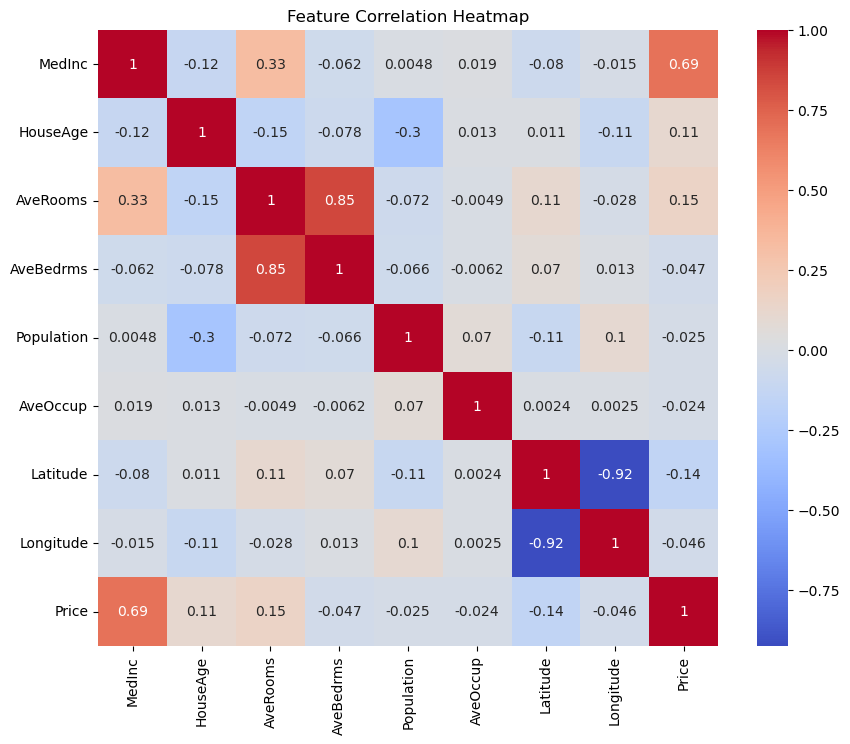

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing  # California dataset (features: income, age; target: prices)
from scipy import stats  # For hypothesis testing
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Advanced plots

# Step 1: Load and prepare dataset (like PHP/MyAdmin table: rows = houses, columns = features + price)
data = fetch_california_housing()  # 20640 samples, 8 features
df = pd.DataFrame(data.data, columns=data.feature_names)  # Pandas DataFrame for table-like data
df['Price'] = data.target  # Add target column

# Step 2: Descriptive Statistics (mean, variance, std dev; like summarizing PHP player stats)
mean_income = np.mean(df['MedInc'])  # Mean median income
variance_income = np.var(df['MedInc'])  # Variance (spread squared)
std_dev_income = np.std(df['MedInc'])  # Std dev (spread in original units)
print(f"Mean MedInc: {mean_income:.2f}")
print(f"Variance MedInc: {variance_income:.2f}")
print(f"Std Dev MedInc: {std_dev_income:.2f}")

# Full stats for all features (DataFrame for table view)
stats_summary = df.describe().T[['mean', 'std']]  # Pandas describe: mean, std dev, etc.
stats_summary['variance'] = stats_summary['std'] ** 2  # Compute variance from std dev
print("Full Stats Summary:\n", stats_summary)

# Step 3: Correlation Analysis (how features relate, like Day 2 matrix)
correlation_matrix = df.corr()  # Pearson correlation (-1 to 1; high = strong relation)
print("Correlation Matrix (Price with features):\n", correlation_matrix['Price'].sort_values(ascending=False))

# Visualize correlation (heatmap for recruiter appeal)
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Heatmap with annotations
plt.title("Feature Correlation Heatmap")  # Title
plt.savefig('statistical_feature_analysis/correlation_heatmap.png')  # Save for GitHub
plt.show()  # Display

# Step 4: Normal Distribution Check (histogram + stats; assume normal for ML errors)
plt.figure(figsize=(8, 6))  # Figure size
sns.histplot(df['MedInc'], kde=True)  # Histogram with kernel density estimate (bell curve)
plt.title("MedInc Distribution (Normal Check)")  # Title
plt.savefig('statistical_feature_analysis/medinc_histogram.png')  # Save
plt.show()

# Kolmogorov-Smirnov test for normality (complex stats)
ks_stat, ks_pvalue = stats.kstest(df['MedInc'], 'norm', args=(mean_income, std_dev_income))  # Test if normal
print(f"KS Test for MedInc Normality: Stat={ks_stat:.2f}, p-value={ks_pvalue:.4f}")  # p > 0.05 = normal

# Step 5: Hypothesis Testing (t-test: complex for recruiter appeal)
# Test: Is mean MedInc higher for high-price houses (> median price)?
median_price = np.median(df['Price'])  # Median price
high_price = df[df['Price'] > median_price]['MedInc']  # Income for high-price houses
low_price = df[df['Price'] <= median_price]['MedInc']  # Income for low-price
t_stat, t_pvalue = stats.ttest_ind(high_price, low_price)  # Independent t-test
print(f"T-Test: High vs Low Price MedInc - t-stat={t_stat:.2f}, p-value={t_pvalue:.4f}")  # p < 0.05 = significant difference

# Step 6: Bayes' Theorem (simple probability update; probabilistic ML)
# Example: P(High Price | High Income) = [P(High Income | High Price) * P(High Price)] / P(High Income)
p_high_price = len(df[df['Price'] > median_price]) / len(df)  # Prior P(High Price)
p_high_income = len(df[df['MedInc'] > mean_income]) / len(df)  # P(High Income)
p_high_income_given_high_price = len(df[(df['Price'] > median_price) & (df['MedInc'] > mean_income)]) / len(df[df['Price'] > median_price])  # Likelihood
p_high_price_given_high_income = (p_high_income_given_high_price * p_high_price) / p_high_income  # Bayes
print(f"Bayes' P(High Price | High Income): {p_high_price_given_high_income:.2f}")